In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [26]:
# Load CSV and select relevant columns
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

# Show first 5 rows
df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# Convert labels to binary (ham=0, spam=1)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
model = MultinomialNB()
model.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [29]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:

[[952  13]
 [ 11 139]]


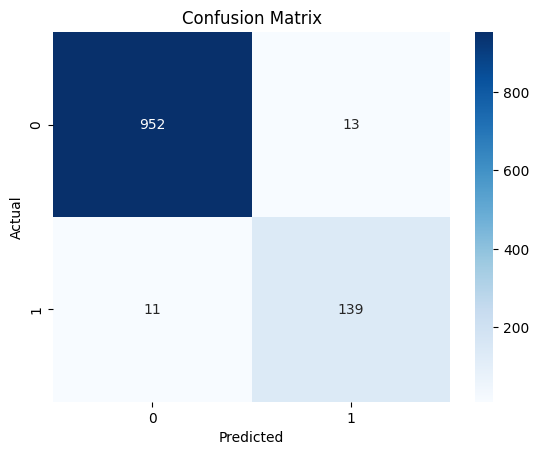

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Spam Email Classification using Scikit-learn

This model predicts whether an email is spam or not using the Naive Bayes classifier.

---

## Step 1: Import Libraries

We import all necessary libraries for preprocessing, modeling, and visualization.

---

## Step 2: Load Dataset

We load the spam.csv file, keeping only the text and label columns.

---

## Step 3: Preprocessing

- Labels are converted to 0 and 1.
- Text is converted into numeric vectors using CountVectorizer.
- Data is split into training and testing sets.

---

## Step 4: Train Model

We use Multinomial Naive Bayes to classify the emails.

---

## Step 5: Evaluate Model

We check model performance using classification report and confusion matrix.

---

## Step 6: Visualize Results

The confusion matrix gives a clear view of correct and incorrect predictions.
